### '0. 사전 작업 사항

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Earthquake_Damage.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [3]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [4]:
damage_grade_distribution = df['damage_grade'].value_counts()
damage_grade_distribution

damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64

#### 0.1

In [5]:
# One-hot encoding for non-numeric columns
categorical_columns = df.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(df, columns=categorical_columns, dtype=int)

# Display the first few rows of the dataset after encoding
data_encoded.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
categorical_columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33830 entries, 0 to 33829
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   building_id                             33830 non-null  int64  
 1   geo_level_1_id                          33830 non-null  int64  
 2   geo_level_2_id                          33830 non-null  int64  
 3   geo_level_3_id                          33830 non-null  int64  
 4   count_floors_pre_eq                     33830 non-null  int64  
 5   age                                     33830 non-null  int64  
 6   area_percentage                         33830 non-null  int64  
 7   height_percentage                       33830 non-null  int64  
 8   has_superstructure_adobe_mud            33830 non-null  int64  
 9   has_superstructure_mud_mortar_stone     33830 non-null  int64  
 10  has_superstructure_stone_flag           33830 non-null  in

In [6]:
data_encoded.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


#### 0.2

In [ ]:
from sklearn.model_selection import train_test_split

# Sample 10,000 instances from the dataset
data_sampled = data_encoded.sample(n=10000, random_state=2018)
data_sampled = data_sampled.drop('building_id', axis=1)
damage_grade_column = data_sampled.pop('damage_grade')
data_sampled['damage_grade'] = damage_grade_column

# Split the sampled data into training (60%), validation (20%), and testing (20%) sets
train_data, temp_data = train_test_split(data_sampled, train_size=6000, random_state=2018)
valid_data, test_data = train_test_split(temp_data, train_size=2000, random_state=2018)

In [ ]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(6000, 69)
(2000, 69)
(2000, 69)


In [ ]:
data_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3078 to 18295
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   geo_level_1_id                          10000 non-null  int64  
 1   geo_level_2_id                          10000 non-null  int64  
 2   geo_level_3_id                          10000 non-null  int64  
 3   count_floors_pre_eq                     10000 non-null  int64  
 4   age                                     10000 non-null  int64  
 5   area_percentage                         10000 non-null  int64  
 6   height_percentage                       10000 non-null  int64  
 7   has_superstructure_adobe_mud            10000 non-null  int64  
 8   has_superstructure_mud_mortar_stone     10000 non-null  int64  
 9   has_superstructure_stone_flag           10000 non-null  int64  
 10  has_superstructure_cement_mortar_stone  10000 non-null  int6

In [ ]:
data_sampled.to_csv('earth.csv', index=False)

In [7]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

분류 성능을 평가/비교시

3-class classification 의 Accuracy 와 Balanced Correction Rate (BCR)

In [23]:
# Performance evaluation function for multi-class classification ----------
def perf_eval_multi(cm):
  # Simple Accuracy
  ACC = np.trace(cm) / np.sum(cm)

  # Balanced Correction Rate
  BCR = np.power(np.prod(np.diag(cm) / np.sum(cm, axis=1)), 1/cm.shape[0])

  return ACC, BCR

In [ ]:
# Initialize performance matrix
perf_summary = pd.DataFrame(index=["MLR", "CART", "ANN"],
                            columns = ["Accuracy", "BCR"])
perf_summary

,Accuracy,BCR
MLR,NaN,NaN
CART,NaN,NaN
ANN,NaN,NaN


### '1. MLR, CART, ANN

X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
df = pd.read_csv('earth.csv') #10000 sampled data
earth_input = df.drop('damage_grade', axis=1)
earth_target = df['damage_grade']

#Normalize the input data
scaler = StandardScaler()
earth_input = scaler.fit_transform(earth_input)

# Split the sampled data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(earth_input, earth_target, test_size=0.4, random_state=2018)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2018)
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)

(((6000, 68), (2000, 68), (2000, 68)), ((6000,), (2000,), (2000,)))

In [ ]:
print(np.min(y_test))
print(np.max(y_test))

1
3


#### 1.1 MLR

In [ ]:
# Multinomial logistic regression
ml_logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
ml_logit.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
print(ml_logit.coef_)

[[ 9.02604284e-02  9.42767090e-03  6.69646487e-02 -1.96457513e-01
   4.49048369e-02  2.93414646e-02 -4.92969954e-02 -1.50656314e-01
  -4.08117375e-01 -2.65029681e-01 -3.12525080e-02 -2.15961499e-01
   1.78066836e-02  1.23949385e-02  3.79657543e-02 -7.13438993e-03
   6.73518082e-03  3.13072274e-02 -1.50932389e-01 -6.43498002e-01
   4.29838902e-01  3.87234613e-01  2.20357423e-01  1.27350373e-01
  -2.18216255e-02  7.53305496e-02  1.00351062e-01  0.00000000e+00
   8.99564587e-02  8.71845323e-02  5.55808409e-03 -9.15486173e-03
  -5.54790079e-04  1.87473780e-02  1.20412755e-01 -1.00940744e-01
  -4.41122767e-02  9.30917701e-02  3.76449150e-02 -1.12728160e-01
   1.26577805e-01 -6.93561465e-02  1.69976271e-02  1.30661908e-01
  -4.11030314e-02  1.12693651e-02 -2.43573262e-02 -4.32507506e-02
   8.11331719e-02  3.31467269e-02  1.61180150e-02 -2.99462214e-01
   1.22344526e-01 -6.82046171e-02  6.45956586e-02 -1.42507185e-01
  -7.94005242e-03 -2.17362595e-02 -2.15578895e-02 -2.50646048e-02
  -1.85583

In [ ]:
# Predict the class label
ml_logit_prey = ml_logit.predict(X_test)

# Calculate performance using confusion matrix
cfmatrix = confusion_matrix(y_test, ml_logit_prey)

perf_summary.iloc[0] = perf_eval_multi(cfmatrix)
perf_summary

,Accuracy,BCR
MLR,0.5825,0.383499
CART,NaN,NaN
ANN,NaN,NaN


#### 1.2 CART

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Classification and Regression Tree (CART)
cart_model = DecisionTreeClassifier(random_state=2018)
cart_model.fit(X_train, y_train)
cart_pred = cart_model.predict(X_test)
cart_acc = accuracy_score(y_test, cart_pred)
cart_bcr = balanced_accuracy_score(y_test, cart_pred)

# Hyperparameter tuning for CART using validation set
cart_params = {'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}
best_cart_acc = 0
best_cart_model = None
for max_depth in cart_params['max_depth']:
    for min_samples_split in cart_params['min_samples_split']:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        model.fit(X_train, y_train)
        val_pred = model.predict(X_val)
        val_acc = accuracy_score(y_val, val_pred)
        if val_acc > best_cart_acc:
            best_cart_acc = val_acc
            best_cart_model = model

# Evaluate the best CART model on the test set
best_cart_pred = best_cart_model.predict(X_test)
best_cart_max_depth = best_cart_model.get_params()['max_depth']
best_cart_min_samples_split = best_cart_model.get_params()['min_samples_split']

print("Best CART Model Hyperparameters:")
print(f"Max Depth: {best_cart_max_depth}")
print(f"Min Samples Split: {best_cart_min_samples_split}")

Best CART Model Hyperparameters:
Max Depth: 5
Min Samples Split: 2


In [ ]:
# Predict the class label
best_cart_pred = best_cart_model.predict(X_test)

# Calculate performance using confusion matrix
cfmatrix = confusion_matrix(y_test, best_cart_pred)

perf_summary.iloc[1] = perf_eval_multi(cfmatrix)
perf_summary

,Accuracy,BCR
MLR,0.5825,0.383499
CART,0.638,0.3535
ANN,NaN,NaN


In [ ]:
cfmatrix

array([[  31,  148,    1],
       [  29, 1057,   55],
       [   6,  485,  188]])

#### 1.3 ANN

In [ ]:
y_train = np.array(y_train.values)-1
y_val = np.array(y_val.values)-1
y_test = np.array(y_test.values)-1

In [ ]:
print(np.min(y_train),np.max(y_train))
print(np.min(y_val),np.max(y_val))
print(np.min(y_test),np.max(y_test))

0 2
0 2
0 2


In [ ]:
# Artificial Neural Network (ANN)
ann_model = MLPClassifier(random_state=2018, max_iter=100)
ann_model.fit(X_train, y_train)
ann_pred = ann_model.predict(X_test)
ann_acc = accuracy_score(y_test, ann_pred)
ann_bcr = balanced_accuracy_score(y_test, ann_pred)

# Hyperparameter tuning for ANN using validation set
ann_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'activation': ['relu', 'tanh']}
best_ann_bcr = 0
best_ann_model = None
for hidden_layers in ann_params['hidden_layer_sizes']:
    for activation in ann_params['activation']:
        model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, random_state=42, max_iter=1000)
        model.fit(X_train, y_train)
        val_pred = model.predict(X_val)
        val_bcr = balanced_accuracy_score(y_test, val_pred)
        if val_bcr > best_ann_bcr:
            best_ann_acc = val_acc
            best_ann_model = model

# Evaluate the best ANN model on the test set
best_ann_pred = best_ann_model.predict(X_test)
best_hidden_layer_sizes = best_ann_model.get_params()['hidden_layer_sizes']
best_activation = best_ann_model.get_params()['activation']

print("Best ANN Model Hyperparameters:")
print(f"Hidden Layer Sizes: {best_hidden_layer_sizes}")
print(f"Activation: {best_activation}")

Best ANN Model Hyperparameters:
Hidden Layer Sizes: (100, 50)
Activation: tanh


In [ ]:
# Predict the class label
best_ann_pred = best_ann_model.predict(X_test)
cfmatrix = confusion_matrix(y_test, best_ann_pred+1)

perf_summary.iloc[2] = perf_eval_multi(cfmatrix)
perf_summary

,Accuracy,BCR
MLR,0.5825,0.383499
CART,0.638,0.3535
ANN,0.549,0.497019


In [ ]:
cfmatrix

array([[ 70,  84,  26],
       [107, 654, 380],
       [ 20, 285, 374]])

In [ ]:
df = pd.read_csv('earth.csv') #10000 sampled data
earth_input = df.drop('damage_grade', axis=1)
earth_target = df['damage_grade']

#Normalize the input data
scaler = StandardScaler()
earth_input = scaler.fit_transform(earth_input)

# Split the sampled data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(earth_input, earth_target, test_size=0.4, random_state=2018)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2018)
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)
print(np.min(y_train),np.max(y_train))
print(np.min(y_val),np.max(y_val))
print(np.min(y_test),np.max(y_test))

1 3
1 3
1 3


### '2. CART_Bagging

In [20]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

In [ ]:
bagging_summary = pd.DataFrame(index=["10", "30", "50", "100", "200", "300"],
                            columns = ["Accuracy", "BCR"])
bagging_summary

,Accuracy,BCR
10,NaN,NaN
30,NaN,NaN
50,NaN,NaN
100,NaN,NaN
200,NaN,NaN
300,NaN,NaN


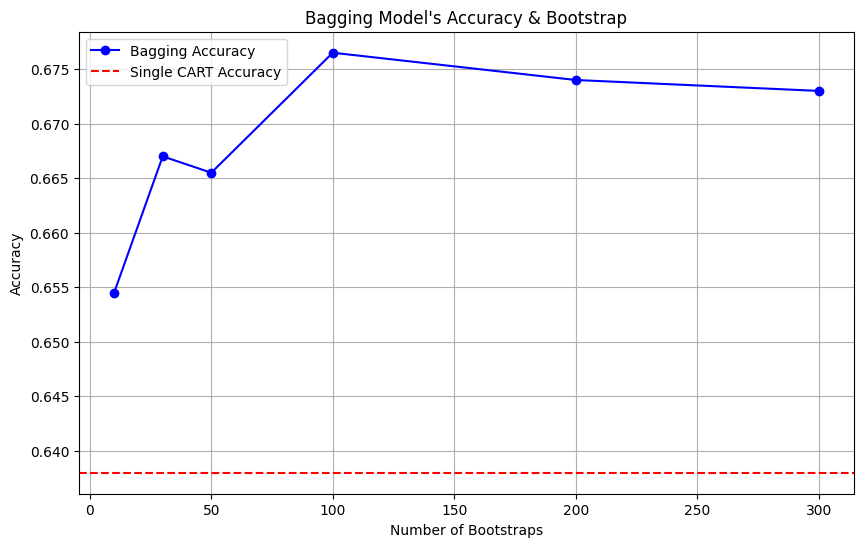

In [ ]:
best_cart_pred = best_cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, best_cart_pred)

bootstrap_samples = [10, 30, 50, 100, 200, 300]
bagging_accuracies = []
k = 0

for n_estimators in bootstrap_samples:
    bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=2018),
                                      n_estimators=n_estimators, random_state=2018)
    bagging_model.fit(X_train, y_train)
    y_pred_bagging = bagging_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_bagging)
    bagging_accuracies.append(accuracy)
    bagging_summary.iloc[k] = perf_eval_multi(confusion_matrix(y_test, y_pred_bagging))
    k += 1

# 성능 시각화
plt.figure(figsize=(10, 6))
plt.plot(bootstrap_samples, bagging_accuracies, marker='o', linestyle='-', color='b', label='Bagging Accuracy')
plt.axhline(y=cart_accuracy, color='r', linestyle='--', label='Single CART Accuracy')
plt.xlabel('Number of Bootstraps')
plt.ylabel('Accuracy')
plt.title("Bagging Model's Accuracy & Bootstrap")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = bagging_summary
df['sum'] = df['Accuracy'] + df['BCR']
df

,Accuracy,BCR,sum
10,0.6545,0.549,1.2035
30,0.667,0.541132,1.208132
50,0.6655,0.541172,1.206672
100,0.6765,0.544886,1.221386
200,0.674,0.543599,1.217599
300,0.673,0.538877,1.211877


### '3. Random Forest

#### 3.1

In [ ]:
rf_summary = pd.DataFrame(index=["10", "30", "50", "100", "200", "300"],
                            columns = ["Accuracy", "BCR"])
rf_summary

,Accuracy,BCR
10,NaN,NaN
30,NaN,NaN
50,NaN,NaN
100,NaN,NaN
200,NaN,NaN
300,NaN,NaN


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Random Forest 모델의 Tree 수에 따른 성능 평가 및 변수 중요도 산출
bootstrap_samples = [10, 30, 50, 100, 200, 300]
rf_accuracies = []
feature_importances = []
k = 0

for n_estimators in bootstrap_samples:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=2020)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(accuracy)
    feature_importances.append(rf_model.feature_importances_)
    rf_summary.iloc[k] = perf_eval_multi(confusion_matrix(y_test, y_pred_rf))
    k += 1

optimal_bootstrap_rf = bootstrap_samples[np.argmax(rf_accuracies)]
print(f'최적의 Random Forest Tree 수: {optimal_bootstrap_rf}')

최적의 Random Forest Tree 수: 300


In [ ]:
rf_summary

,Accuracy,BCR
10,0.6145,0.496828
30,0.643,0.49603
50,0.6515,0.509037
100,0.6505,0.488913
200,0.656,0.477636
300,0.659,0.487192


In [ ]:
df = rf_summary
df['sum'] = df['Accuracy'] + df['BCR']
df

,Accuracy,BCR,sum
10,0.6145,0.496828,1.111328
30,0.643,0.49603,1.13903
50,0.6515,0.509037,1.160537
100,0.6505,0.488913,1.139413
200,0.656,0.477636,1.133636
300,0.659,0.487192,1.146192


#### 3.2

In [ ]:
combined_df = pd.concat([bagging_summary.iloc[[2]], rf_summary.iloc[[5]]], axis=0).reset_index(drop=True)
combined_df = combined_df.drop(columns=['sum'])
combined_df.index = ['CART', 'RF']
combined_df

,Accuracy,BCR
CART,0.6655,0.541172
RF,0.659,0.487192


#### 3.3

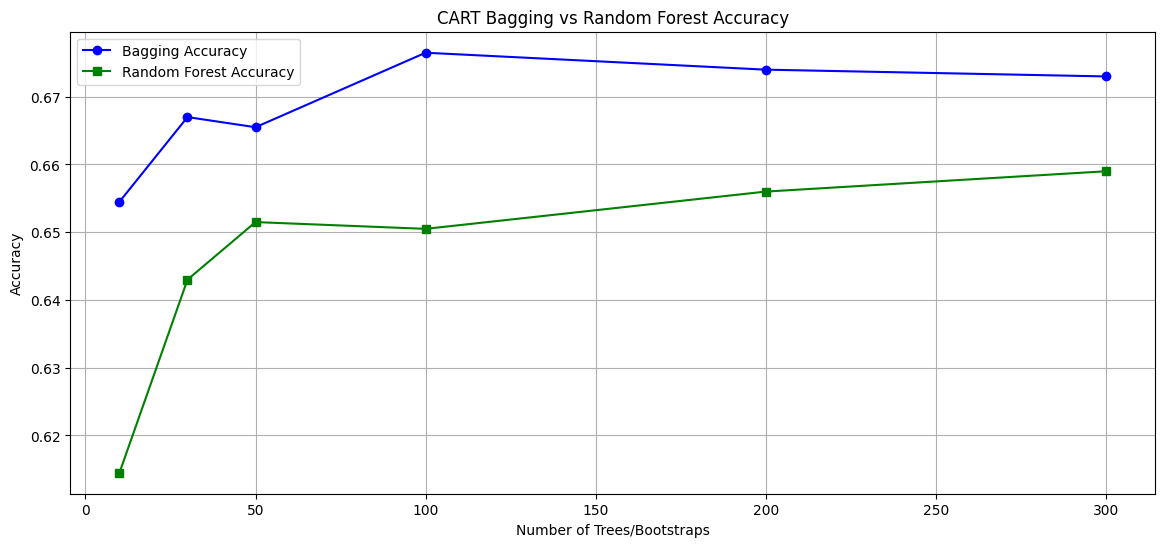

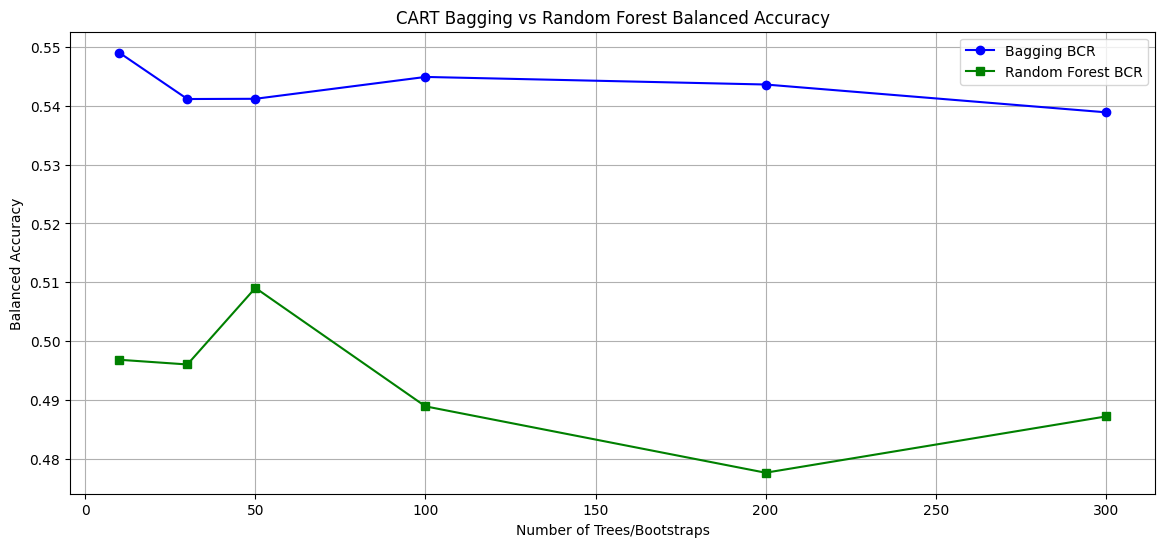

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt

bagging_accuracies = bagging_summary['Accuracy']
bagging_bcrs = bagging_summary['BCR']
rf_accuracies = rf_summary['Accuracy']
rf_bcrs = rf_summary['BCR']

# Accuracy
plt.figure(figsize=(14, 6))
plt.plot(bootstrap_samples, bagging_accuracies, marker='o', linestyle='-', color='b', label='Bagging Accuracy')
plt.plot(bootstrap_samples, rf_accuracies, marker='s', linestyle='-', color='g', label='Random Forest Accuracy')
plt.xlabel('Number of Trees/Bootstraps')
plt.ylabel('Accuracy')
plt.title('CART Bagging vs Random Forest Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# BCR
plt.figure(figsize=(14, 6))
plt.plot(bootstrap_samples, bagging_bcrs, marker='o', linestyle='-', color='b', label='Bagging BCR')
plt.plot(bootstrap_samples, rf_bcrs, marker='s', linestyle='-', color='g', label='Random Forest BCR')
plt.xlabel('Number of Trees/Bootstraps')
plt.ylabel('Balanced Accuracy')
plt.title('CART Bagging vs Random Forest Balanced Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=2020)
rf_model.fit(X_train, y_train)
# Variable Importance
var_imp = rf_model.feature_importances_

var_imp_df = pd.DataFrame(
    data = var_imp,
    columns = ['variables importance'],
    index = data_sampled.columns[:-1]
).sort_values('variables importance', ascending=False).head(10)
var_imp_df

,variables importance
geo_level_3_id,0.133088
geo_level_2_id,0.130259
geo_level_1_id,0.127957
age,0.094124
area_percentage,0.092306
height_percentage,0.061306
count_floors_pre_eq,0.023614
count_families,0.022673
has_superstructure_mud_mortar_stone,0.015753
has_superstructure_timber,0.014980


<Axes: xlabel='None', ylabel='variables importance'>

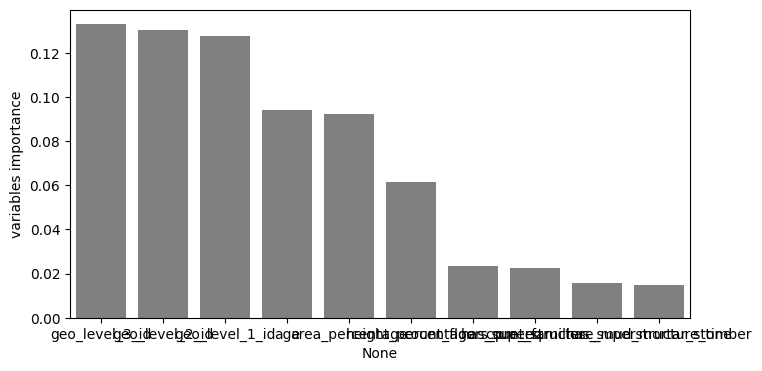

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(
    x     = var_imp_df.index,
    y     = 'variables importance',
    color = 'grey',
    data  = var_imp_df
)

### '4. ANN

In [ ]:
var_imp_df.index

Index(['geo_level_3_id', 'geo_level_2_id', 'geo_level_1_id', 'age',
       'area_percentage', 'height_percentage', 'count_floors_pre_eq',
       'count_families', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_timber'],
      dtype='object')

In [ ]:
df = pd.read_csv('earth.csv') #10000 sampled data
earth_input = df.drop('damage_grade', axis=1)
var_imp_df = ['geo_level_3_id', 'geo_level_2_id', 'geo_level_1_id', 'age',
       'area_percentage', 'height_percentage', 'count_floors_pre_eq',
       'count_families', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_timber']
earth_input = earth_input[var_imp_df]
earth_target = df['damage_grade']

#Normalize the input data
scaler = StandardScaler()
earth_input = scaler.fit_transform(earth_input)

# Split the sampled data into training (60%), validation (20%), and testing (20%) sets
X_train_ann, X_temp_ann, y_train, y_temp = train_test_split(earth_input, earth_target, test_size=0.4, random_state=2018)
X_val_ann, X_test_ann, y_val, y_test = train_test_split(X_temp_ann, y_temp, test_size=0.5, random_state=2018)
y_train = np.array(y_train.values)-1
y_val = np.array(y_val.values)-1
y_test = np.array(y_test.values)-1
print(X_train_ann.shape, X_val_ann.shape, X_test_ann.shape), (y_train.shape, y_val.shape, y_test.shape)
print(np.min(y_train),np.max(y_train))
print(np.min(y_val),np.max(y_val))
print(np.min(y_test),np.max(y_test))

(6000, 10) (2000, 10) (2000, 10)
0 2
0 2
0 2


In [ ]:
# Artificial Neural Network (ANN)
ann_model = MLPClassifier(random_state=2018, max_iter=100)
ann_model.fit(X_train_ann, y_train)
ann_pred = ann_model.predict(X_test_ann)
ann_acc = accuracy_score(y_test, ann_pred)
ann_bcr = balanced_accuracy_score(y_test, ann_pred)

# Hyperparameter tuning for ANN using validation set
ann_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'activation': ['relu', 'tanh']}
best_ann_bcr = 0
best_ann_model = None
for hidden_layers in ann_params['hidden_layer_sizes']:
    for activation in ann_params['activation']:
        model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, random_state=2018, max_iter=100)
        model.fit(X_train_ann, y_train)
        val_pred = model.predict(X_val_ann)
        val_bcr = balanced_accuracy_score(y_test, val_pred)
        if val_bcr > best_ann_bcr:
            best_ann_acc = val_acc
            best_ann_model = model

# Evaluate the best ANN model on the test set
best_ann_pred = best_ann_model.predict(X_test_ann)
best_hidden_layer_sizes = best_ann_model.get_params()['hidden_layer_sizes']
best_activation = best_ann_model.get_params()['activation']

print("Best ANN Model Hyperparameters:")
print(f"Hidden Layer Sizes: {best_hidden_layer_sizes}")
print(f"Activation: {best_activation}")

Best ANN Model Hyperparameters:
Hidden Layer Sizes: (100, 50)
Activation: tanh


In [ ]:
# Initialize performance matrix
perf_summary1 = pd.DataFrame(index=["ANN"],
                            columns = ["Accuracy", "BCR"])
best_ann_pred = best_ann_model.predict(X_test_ann)
cfmatrix = confusion_matrix(y_test, best_ann_pred)

perf_summary1.iloc[0] = perf_eval_multi(cfmatrix)
perf_summary1

,Accuracy,BCR
ANN,0.614,0.486343


In [ ]:
cfmatrix

array([[ 68, 100,  12],
       [ 63, 897, 181],
       [  6, 410, 263]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import numpy as np

# 반복 횟수 설정
n_iterations = 10
perf_summary2 = pd.DataFrame(index=[i for i in range(1,11)],
                            columns = ["Accuracy", "BCR"])

for i in range(n_iterations):
    model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, random_state=i)
    model.fit(X_train_ann, y_train)
    ann_pred = model.predict(X_test_ann)
    cfmatrix = confusion_matrix(y_test, ann_pred)
    perf_summary2.iloc[i] = perf_eval_multi(cfmatrix)

perf_summary2

,Accuracy,BCR
1,0.61,0.520008
2,0.6095,0.48601
3,0.608,0.505673
4,0.618,0.507447
5,0.598,0.487469
6,0.6095,0.513725
7,0.6075,0.484126
8,0.6005,0.48965
9,0.6155,0.51079
10,0.6055,0.501558


In [ ]:
mean_values = perf_summary2.mean()
std_values = perf_summary2.std()
result_df = pd.DataFrame({
    'Mean': mean_values,
    'StD': std_values
})
result_df

,Mean,StD
Accuracy,0.6082,0.006029
BCR,0.500646,0.012922


### '5. ANN_Bagging

In [ ]:
ann_summary = pd.DataFrame(index=["10", "30", "50", "100", "200", "300"],
                            columns = ["Accuracy", "BCR"])
ann_summary

,Accuracy,BCR
10,NaN,NaN
30,NaN,NaN
50,NaN,NaN
100,NaN,NaN
200,NaN,NaN
300,NaN,NaN


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import numpy as np

best_ann_model = MLPClassifier(hidden_layer_sizes=(100, 50),activation='tanh',
                            random_state=2018, max_iter=100)
best_ann_model.fit(X_train_ann, y_train)
best_ann_pred = best_ann_model.predict(X_test_ann)
ann_accuracy = accuracy_score(y_test, best_ann_pred)

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
bootstrap_samples = [10, 30, 50, 100, 200, 300]
bagging_accuracies = []
k = 0

for n_estimators in bootstrap_samples:
    bagging_model = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(100, 50),
                                                                   activation='tanh',
                                                                   random_state=2018,
                                                                   max_iter=100),
                                      n_estimators=n_estimators,
                                      n_jobs         = 8,
                                      bootstrap      = True,
                                      random_state=2018,
                                      verbose        = 1)

    print(n_estimators)
    bagging_model.fit(X_train_ann, y_train)
    y_pred_bagging = bagging_model.predict(X_test_ann)
    accuracy = accuracy_score(y_test, y_pred_bagging)
    bagging_accuracies.append(accuracy)
    ann_summary.iloc[k] = perf_eval_multi(confusion_matrix(y_test, y_pred_bagging))
    k += 1

10


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   59.9s remaining:  3.0min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


30


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  3.4min remaining: 10.3min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  4.2min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


50


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  5.1min remaining: 15.3min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  7.0min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


100


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed: 11.5min remaining: 34.4min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed: 14.1min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.7s remaining:    5.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


200


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed: 26.2min remaining: 78.7min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed: 29.2min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    2.0s remaining:    5.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


300


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed: 42.7min remaining: 128.1min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed: 43.1min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.5s finished


In [ ]:
ann_summary

,Accuracy,BCR
10,0.601,0.479418
30,0.61,0.476486
50,0.6085,0.479739
100,0.6135,0.484844
200,0.608,0.477911
300,0.6095,0.473593


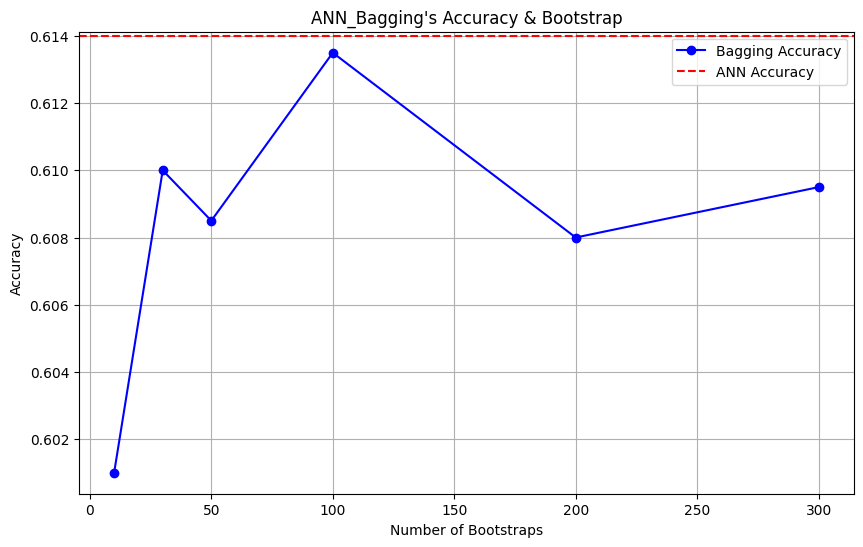

In [ ]:
# 성능 시각화
plt.figure(figsize=(10, 6))
plt.plot(bootstrap_samples, bagging_accuracies, marker='o', linestyle='-', color='b', label='Bagging Accuracy')
plt.axhline(y=ann_accuracy, color='r', linestyle='--', label='ANN Accuracy')
plt.xlabel('Number of Bootstraps')
plt.ylabel('Accuracy')
plt.title("ANN_Bagging's Accuracy & Bootstrap")
plt.legend()
plt.grid(True)
plt.show()

### '6. AdaBoost

In [ ]:
#########################X_test, Y_test#############################################
df = pd.read_csv('earth.csv') #10000 sampled data
earth_input = df.drop('damage_grade', axis=1)
earth_target = df['damage_grade']

#Normalize the input data
scaler = StandardScaler()
earth_input = scaler.fit_transform(earth_input)

# Split the sampled data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(earth_input, earth_target, test_size=0.4, random_state=2018)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2018)
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)

(((6000, 68), (2000, 68), (2000, 68)), ((6000,), (2000,), (2000,)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'base_estimator': [DecisionTreeClassifier(max_depth=1),
                       DecisionTreeClassifier(max_depth=3),
                       DecisionTreeClassifier(max_depth=5)],
    'learning_rate': [0.1, 0.5, 1.0]
}

model = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

# 최적의 hyperparameter 출력
print("최적의 hyperparameter:")
print(grid_search.best_params_)

최적의 hyperparameter:
{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.5, 'n_estimators': 100}


In [ ]:
ada_summary = pd.DataFrame(index=["AdaBoost"],
                            columns = ["Accuracy", "BCR"])
ada_summary

,Accuracy,BCR
AdaBoost,NaN,NaN


In [ ]:
ada_model = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=1),
    n_estimators   = 100,
    learning_rate  = 0.5,
    random_state   = 2018
)
ada_model.fit(X_train,y_train)
ada_pred = ada_model.predict(X_test)
adaboost_cfm = confusion_matrix(y_test, ada_pred)
ada_summary.iloc[0] = perf_eval_multi(adaboost_cfm)
ada_summary

,Accuracy,BCR
AdaBoost,0.64,0.432989


In [ ]:
adaboost_cfm

array([[  55,  125,    0],
       [  51, 1024,   66],
       [   1,  477,  201]])

In [ ]:
ada_model = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=1),
    n_estimators   = 100,
    learning_rate  = 0.05,
    random_state   = 2018
)
ada_model.fit(X_train,y_train)
ada_pred = ada_model.predict(X_test)
adaboost_cfm = confusion_matrix(y_test, ada_pred)
ada_summary.iloc[0] = perf_eval_multi(adaboost_cfm)
ada_summary

,Accuracy,BCR
AdaBoost,0.574,0.0


### '7. Gradient_Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9]
}

gbm = GradientBoostingRegressor(random_state=2018)
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)

# 최적 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
gbm_summary = pd.DataFrame(index=["GBM"],
                            columns = ["Accuracy", "BCR"])
gbm_summary

,Accuracy,BCR
GBM,NaN,NaN


In [ ]:
# Training GBM
gbm_model = GradientBoostingClassifier(
    n_estimators   = 200,
    learning_rate  = 0.05,
    subsample      = 0.8,
    max_depth      = 4,
    random_state   = 2018
)

gbm_model.fit(X_train,y_train)
gbm_pred = gbm_model.predict(X_test)
gbm_cfm = confusion_matrix(y_test, gbm_pred)
gbm_summary.iloc[0] = perf_eval_multi(gbm_cfm)
gbm_summary

,Accuracy,BCR
GBM,0.675,0.524794


In [ ]:
gbm_cfm

array([[ 65, 114,   1],
       [ 46, 963, 132],
       [  4, 353, 322]])

In [ ]:
# Variable Importance
var_imp = gbm_model.feature_importances_

var_imp_df = pd.DataFrame(
    data = var_imp,
    columns = ['variables importance'],
    index = data_sampled.columns[:-1]
).sort_values('variables importance', ascending=False).head(10)
var_imp_df


,variables importance
geo_level_1_id,0.305370
geo_level_2_id,0.123018
geo_level_3_id,0.105843
foundation_type_r,0.064259
age,0.050568
area_percentage,0.043457
roof_type_x,0.030165
ground_floor_type_v,0.029821
height_percentage,0.025922
has_superstructure_mud_mortar_stone,0.023817


<Axes: xlabel='variables importance', ylabel='None'>

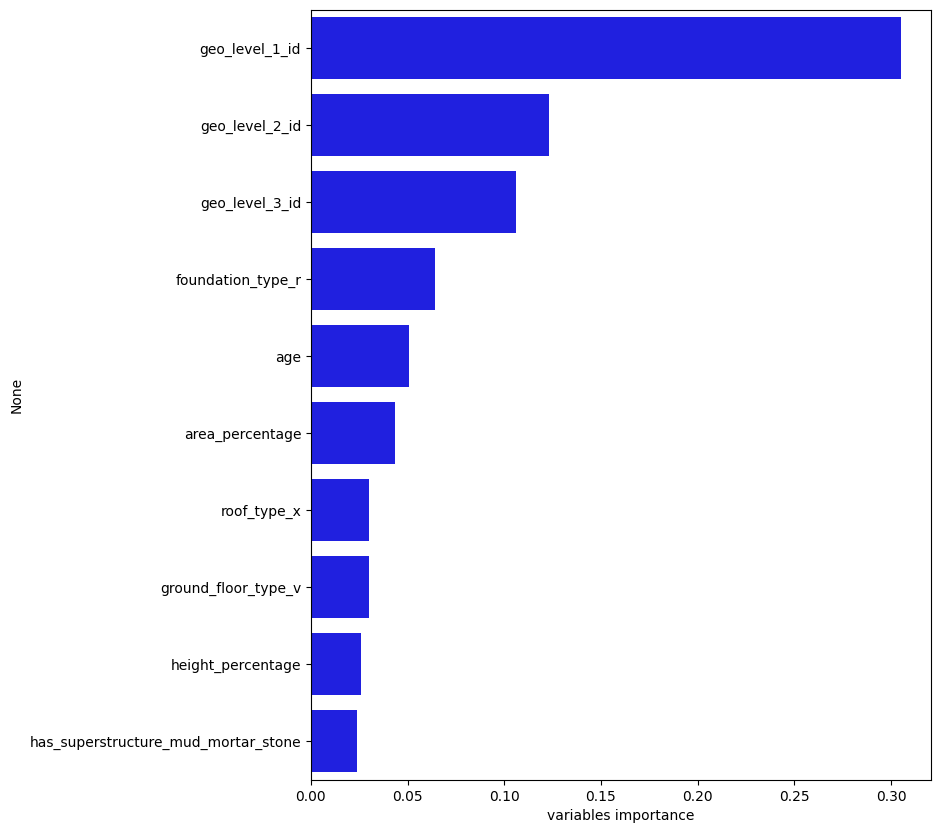

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(
    x     = 'variables importance',
    y     = var_imp_df.index,
    color = 'blue',
    data  = var_imp_df
)

### 'EXTRA

#### 1) SMOTE

In [1]:
pip install imbalanced-learn

In [35]:
data_sampled = data_encoded.sample(n=10000, random_state=2018)
data_sampled = data_sampled.drop('building_id', axis=1)
df = data_sampled
earth_input = df.drop('damage_grade', axis=1)
earth_target = df['damage_grade']

#Normalize the input data
scaler = StandardScaler()
earth_input = scaler.fit_transform(earth_input)

# Split the sampled data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(earth_input, earth_target, test_size=0.4, random_state=2018)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2018)
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)

(((6000, 68), (2000, 68), (2000, 68)), ((6000,), (2000,), (2000,)))

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2018)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'원본 데이터 클래스 분포: {y_train.value_counts()}')
print()
print(f'증강된 데이터 클래스 분포: {y_train_resampled.value_counts()}')

원본 데이터 클래스 분포: damage_grade
2    3388
3    2005
1     607
Name: count, dtype: int64

증강된 데이터 클래스 분포: damage_grade
3    3388
2    3388
1    3388
Name: count, dtype: int64


In [13]:
bagging_summary = pd.DataFrame(index=["10", "30", "50", "100", "200", "300"],
                            columns = ["Accuracy", "BCR"])
bagging_summary

,Accuracy,BCR
10,NaN,NaN
30,NaN,NaN
50,NaN,NaN
100,NaN,NaN
200,NaN,NaN
300,NaN,NaN


In [30]:
bootstrap_samples = [10, 30, 50, 100, 200, 300]
k = 0
X_train = X_train_resampled
y_train = y_train_resampled

for n_estimators in bootstrap_samples:
    bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=2018),
                                      n_estimators=n_estimators, random_state=2018)
    bagging_model.fit(X_train, y_train)
    y_pred_bagging = bagging_model.predict(X_test)
    bagging_summary.iloc[k] = perf_eval_multi(confusion_matrix(y_test, y_pred_bagging))
    k += 1
    print(k)

bagging_summary

1
2
3
4
5
6


,Accuracy,BCR
10,0.637,0.588734
30,0.6565,0.600423
50,0.654,0.588933
100,0.648,0.581402
200,0.663,0.593276
300,0.658,0.585257


#### 2) UnderSampling

In [33]:
from imblearn.under_sampling import RandomUnderSampler

# RandomUnderSampler 객체 생성
rus = RandomUnderSampler(random_state=2018)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print(f'원본 데이터 클래스 분포: {y_train.value_counts()}')
print()
print(f'언더샘플링된 데이터 클래스 분포: {y_train_resampled.value_counts()}')

원본 데이터 클래스 분포: damage_grade
2    3388
3    2005
1     607
Name: count, dtype: int64
언더샘플링된 데이터 클래스 분포: damage_grade
1    607
2    607
3    607
Name: count, dtype: int64


In [34]:
bootstrap_samples = [10, 30, 50, 100, 200, 300]
bagging_summary = pd.DataFrame(index=["10", "30", "50", "100", "200", "300"],
                            columns = ["Accuracy", "BCR"])
k = 0
X_train = X_train_resampled
y_train = y_train_resampled

for n_estimators in bootstrap_samples:
    bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=2018),
                                      n_estimators=n_estimators, random_state=2018)
    bagging_model.fit(X_train, y_train)
    y_pred_bagging = bagging_model.predict(X_test)
    bagging_summary.iloc[k] = perf_eval_multi(confusion_matrix(y_test, y_pred_bagging))
    k += 1
    print(k)

bagging_summary

1
2
3
4
5
6


,Accuracy,BCR
10,0.5345,0.598503
30,0.5575,0.623215
50,0.5545,0.624172
100,0.56,0.626738
200,0.552,0.619877
300,0.554,0.619783


In [36]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

print(f'원본 데이터 클래스 분포: {y_train.value_counts()}')
print()
print(f'언더샘플링된 데이터 클래스 분포: {y_train_resampled.value_counts()}')

원본 데이터 클래스 분포: damage_grade
2    3388
3    2005
1     607
Name: count, dtype: int64

언더샘플링된 데이터 클래스 분포: damage_grade
2    2772
3    1489
1     607
Name: count, dtype: int64


In [37]:
bootstrap_samples = [10, 30, 50, 100, 200, 300]
bagging_summary = pd.DataFrame(index=["10", "30", "50", "100", "200", "300"],
                            columns = ["Accuracy", "BCR"])
k = 0
X_train = X_train_resampled
y_train = y_train_resampled

for n_estimators in bootstrap_samples:
    bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=2018),
                                      n_estimators=n_estimators, random_state=2018)
    bagging_model.fit(X_train, y_train)
    y_pred_bagging = bagging_model.predict(X_test)
    bagging_summary.iloc[k] = perf_eval_multi(confusion_matrix(y_test, y_pred_bagging))
    k += 1

bagging_summary

,Accuracy,BCR
10,0.6475,0.574504
30,0.6675,0.583177
50,0.6725,0.584835
100,0.6675,0.567448
200,0.6705,0.564967
300,0.67,0.568602


In [38]:
print(f'테스트 데이터 클래스 분포: {y_test.value_counts()}')

테스트 데이터 클래스 분포: damage_grade
2    1141
3     679
1     180
Name: count, dtype: int64
